In [1]:
import json
import numpy as np
import pylab as plt
%matplotlib inline

def load_R_model(filename):
    with open(filename, 'r') as j:
        data_input = json.load(j)
    data = {'topic_term_dists': data_input['phi'], 
            'doc_topic_dists': data_input['theta'],
            'doc_lengths': data_input['doc.length'],
            'vocab': data_input['vocab'],
            'term_frequency': data_input['term.frequency']}
    return data

In [15]:
movies_model_data = load_R_model('movie_reviews_input.json')
print movies_model_data

{'vocab': [u'film', u'movie', u'good', u'time', u'story', u'films', u'characters', u'character', u'make', u'life', u'plot', u'movies', u'people', u'bad', u'scene', u'man', u'scenes', u'doesnt', u'dont', u'director', u'action', u'hes', u'great', u'love', u'made', u'big', u'end', u'back', u'work', u'world', u'makes', u'years', u'real', u'performance', u'audience', u'role', u'isnt', u'things', u'comedy', u'funny', u'long', u'thing', u'fact', u'played', u'find', u'john', u'cast', u'script', u'star', u'year', u'plays', u'young', u'actors', u'show', u'part', u'original', u'screen', u'acting', u'point', u'day', u'lot', u'takes', u'effects', u'minutes', u'guy', u'interesting', u'im', u'family', u'high', u'place', u'set', u'watch', u'making', u'hard', u'fun', u'didnt', u'special', u'times', u'bit', u'wife', u'american', u'give', u'kind', u'job', u'sense', u'home', u'picture', u'series', u'half', u'hollywood', u'pretty', u'actor', u'woman', u'men', u'black', u'dialogue', u'money', u'watching', u

In [3]:
print('Topic-Term shape: %s' % str(np.array(movies_model_data['topic_term_dists']).shape))
print('Doc-Topic shape: %s' % str(np.array(movies_model_data['doc_topic_dists']).shape))

Topic-Term shape: (20, 14567)
Doc-Topic shape: (2000, 20)


In [4]:
print type(movies_model_data['topic_term_dists'])
print type(movies_model_data['topic_term_dists'][0])
print type(np.array(movies_model_data['topic_term_dists']))

<type 'list'>
<type 'list'>
<type 'numpy.ndarray'>


In [5]:
print len(movies_model_data['doc_lengths'])
print type(movies_model_data['doc_lengths'])

2000
<type 'list'>


(array([ 109.,  683.,  755.,  308.,   96.,   36.,    9.,    1.,    2.,    1.]),
 array([    6. ,   117.8,   229.6,   341.4,   453.2,   565. ,   676.8,
          788.6,   900.4,  1012.2,  1124. ]),
 <a list of 10 Patch objects>)

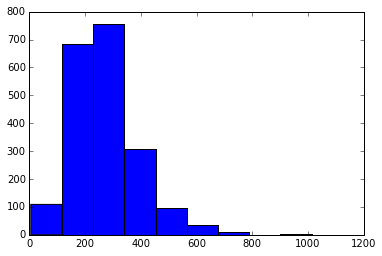

In [6]:
plt.hist(movies_model_data['doc_lengths'])

In [7]:
print type(movies_model_data['vocab'])
print movies_model_data['vocab'][0]
print movies_model_data['vocab'][1]

<type 'list'>
film
movie


In [12]:
print movies_model_data['term_frequency']

[8939 5544 2411 ...,    5    5    5]


In [9]:
movies_model_data['topic_term_dists'] = np.array(movies_model_data['topic_term_dists'])
movies_model_data['doc_topic_dists'] = np.array(movies_model_data['doc_topic_dists'])
movies_model_data['doc_lengths'] = np.array(movies_model_data['doc_lengths'])
movies_model_data['term_frequency'] = np.array(movies_model_data['term_frequency'])

In [13]:
print movies_model_data['topic_term_dists'].shape
print movies_model_data['doc_topic_dists'].shape
print movies_model_data['doc_lengths'].shape
print movies_model_data['term_frequency'].shape

(20, 14567)
(2000, 20)
(2000,)
(14567,)


In [10]:
import pyLDAvis
movies_vis_data = pyLDAvis.prepare(**movies_model_data)

In [11]:
pyLDAvis.display(movies_vis_data)